In [1]:
import circuit_lengths
from problems import IntegerKnapsack, IntegerKnapsackPisinger

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import quantum_plots as qp
import matplotlib as mpl
_ = qp.global_setup(fontsize=11)

## Circuit Depth analysis

### Random generated (my version)

In [2]:
Ns = range(6, 24, 2)
instances = 64

problems = []
for N in Ns:
    problems += IntegerKnapsack.get_instances()[N][:instances]

In [3]:
data = []
for p in problems:
    d = dict(
        n_qubits=p.n_qubits,
        id=p.id,
        ratio=p.max_capacity / sum(p.weights)
    )
    d.update(
        dict(
            layers=circuit_lengths.circuit_depth_qpe(p),
            two_qubit_ops=circuit_lengths.two_qubit_ops_qpe(p),
            method="qpe"
        )
    )
    data.append(d)
    d = d.copy()
    d.update(
        dict(
            layers=circuit_lengths.circuit_depth_penalty(p),
            two_qubit_ops=circuit_lengths.two_qubit_ops_penalty(p),
            method="penalty"
        )
    )
    data.append(d)


df = pd.DataFrame(data)

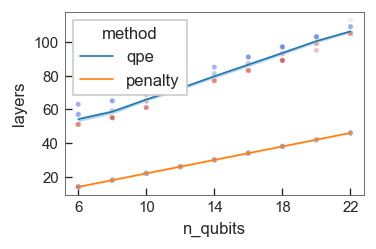

In [4]:
# The circuit layers at p = 1
fig, ax = qp.plot_setup()

sns.lineplot(df, x="n_qubits", y="layers", hue="method", ax=ax)
sns.scatterplot(df, x="n_qubits", y="layers", hue="ratio", alpha=0.1, palette="coolwarm", legend=False, ax=ax)

ax.set_xticks(range(6, 24, 4))
# fig.savefig("test.pdf", bbox_inches="tight")

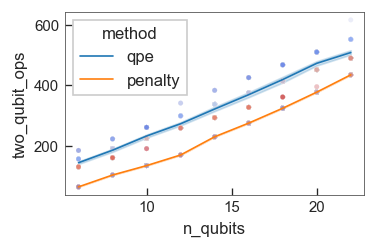

In [5]:
fig, ax = qp.plot_setup()

# The two-qubit operations
sns.lineplot(df, x="n_qubits", y="two_qubit_ops", hue="method", ax=ax)
sns.scatterplot(df, x="n_qubits", y="two_qubit_ops", hue="ratio", alpha=0.1, palette="coolwarm", legend=False, ax=ax)

# fig.savefig("test2.pdf")

### Random generated (Pisinger)

In [6]:
Ns = range(6)
instances = 16

problems = []
for N in Ns:
    n = 100 * N
    problems += IntegerKnapsackPisinger.get_instances()[20][n:n+instances]

In [7]:
data = []
for p in problems:
    d = dict(
        n_qubits=p.n_qubits,
        id=p.id,
        ratio=p.max_capacity / sum(p.weights),
        gen_type=p.gen_type
    )
    d.update(
        dict(
            layers=circuit_lengths.circuit_depth_qpe(p),
            two_qubit_ops=circuit_lengths.two_qubit_ops_qpe(p),
            method="qpe"
        )
    )
    data.append(d)
    d = d.copy()
    d.update(
        dict(
            layers=circuit_lengths.circuit_depth_penalty(p),
            two_qubit_ops=circuit_lengths.two_qubit_ops_penalty(p),
            method="penalty"
        )
    )
    data.append(d)


df = pd.DataFrame(data)

<Axes: xlabel='gen_type', ylabel='layers'>

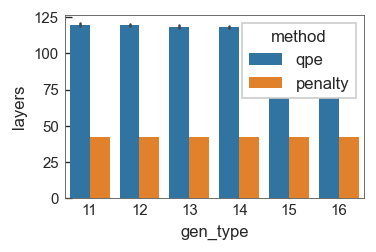

In [8]:
# The circuit layers at p = 1
fig, ax = qp.plot_setup()

sns.barplot(df, x="gen_type", y="layers", hue="method")